<a href="https://colab.research.google.com/github/konrad98ft/cutting-inserts-detection/blob/master/IncepctionV3_cutting_inserts_deepl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Incepction V3 model traning**

---



---




# Imports

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import urllib.request
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Budowa modelu

In [ ]:
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

# Freeze existing layers
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Pobieranie danych

In [ ]:
data_set_path = '/content/drive/MyDrive/cutting-inserts-samples/DATA_SET_7/'
extract_folder_path = '/content/DATA_SET_7/'
#TRANING
training_file_name = data_set_path + "traning.zip"
training_dir = extract_folder_path + 'traning/'
zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

#VALIDATION
validation_file_name = data_set_path + "validation.zip"
validation_dir = extract_folder_path + 'validation/'
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

#TEST
test_file_name = data_set_path + "test.zip"
test_dir = extract_folder_path + 'test/'
zip_ref = zipfile.ZipFile(test_file_name, 'r')
zip_ref.extractall(test_dir)
zip_ref.close()





# Augumentaion 

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   zoom_range=0.05,
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   horizontal_flip=True,
                                   vertical_flip=True,  
                                   rotation_range=5)



# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))





Found 138 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


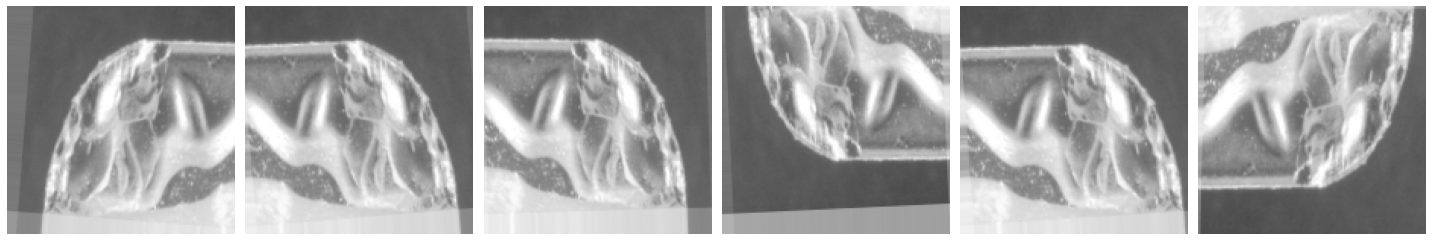

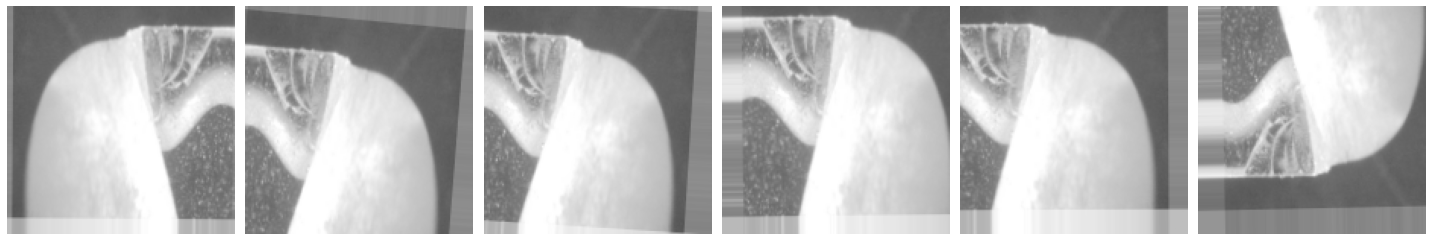

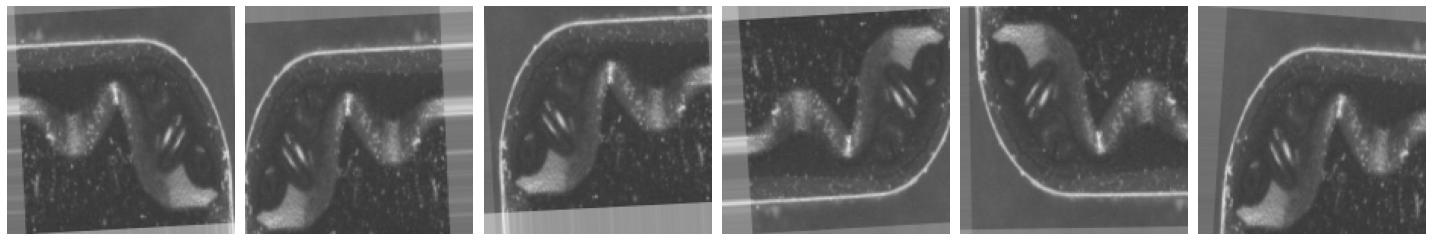

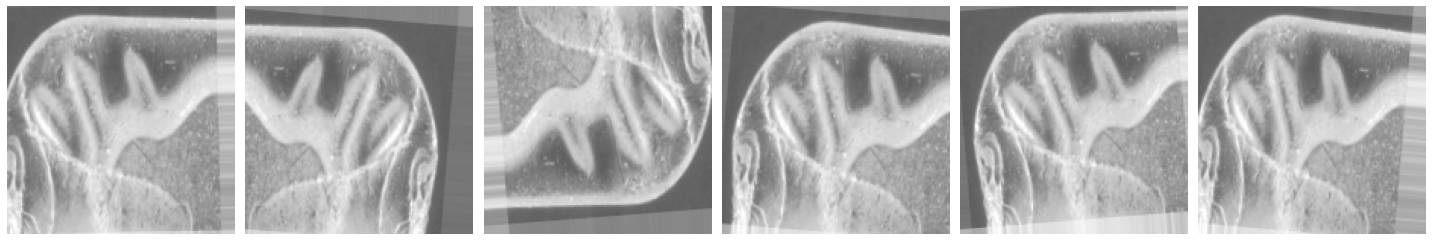

In [ ]:
#Example augumentation
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('Off')
    plt.tight_layout()
    plt.show()
    
for j in range(4):
  augmented_images = [train_generator[0][0][j] for i in range(6) ]
  plotImages(augmented_images)


# Model fit

In [ ]:
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=20,
            verbose=2)

Epoch 1/20
7/7 - 8s - loss: 1.0756 - acc: 0.6377 - val_loss: 0.2258 - val_acc: 0.9038
Epoch 2/20
7/7 - 1s - loss: 0.2420 - acc: 0.8913 - val_loss: 0.2453 - val_acc: 0.8654
Epoch 3/20
7/7 - 1s - loss: 0.1690 - acc: 0.9275 - val_loss: 0.2521 - val_acc: 0.8846
Epoch 4/20
7/7 - 1s - loss: 0.1664 - acc: 0.9275 - val_loss: 0.3628 - val_acc: 0.8654
Epoch 5/20
7/7 - 1s - loss: 0.2604 - acc: 0.9203 - val_loss: 0.1386 - val_acc: 0.9423
Epoch 6/20
7/7 - 1s - loss: 0.1876 - acc: 0.9203 - val_loss: 0.3996 - val_acc: 0.8269
Epoch 7/20
7/7 - 1s - loss: 0.1625 - acc: 0.9348 - val_loss: 0.3726 - val_acc: 0.8462
Epoch 8/20
7/7 - 1s - loss: 0.1447 - acc: 0.9493 - val_loss: 0.5216 - val_acc: 0.8654
Epoch 9/20
7/7 - 1s - loss: 0.2693 - acc: 0.8768 - val_loss: 0.2613 - val_acc: 0.9038
Epoch 10/20
7/7 - 1s - loss: 0.1483 - acc: 0.9203 - val_loss: 0.2122 - val_acc: 0.9231
Epoch 11/20
7/7 - 1s - loss: 0.1027 - acc: 0.9565 - val_loss: 0.2537 - val_acc: 0.9038
Epoch 12/20
7/7 - 1s - loss: 0.1622 - acc: 0.9130 - 

# Accuracy and los visualization

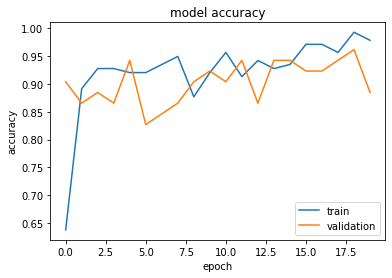

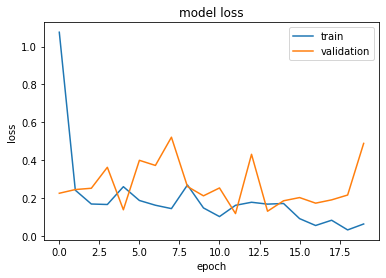

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Example samples

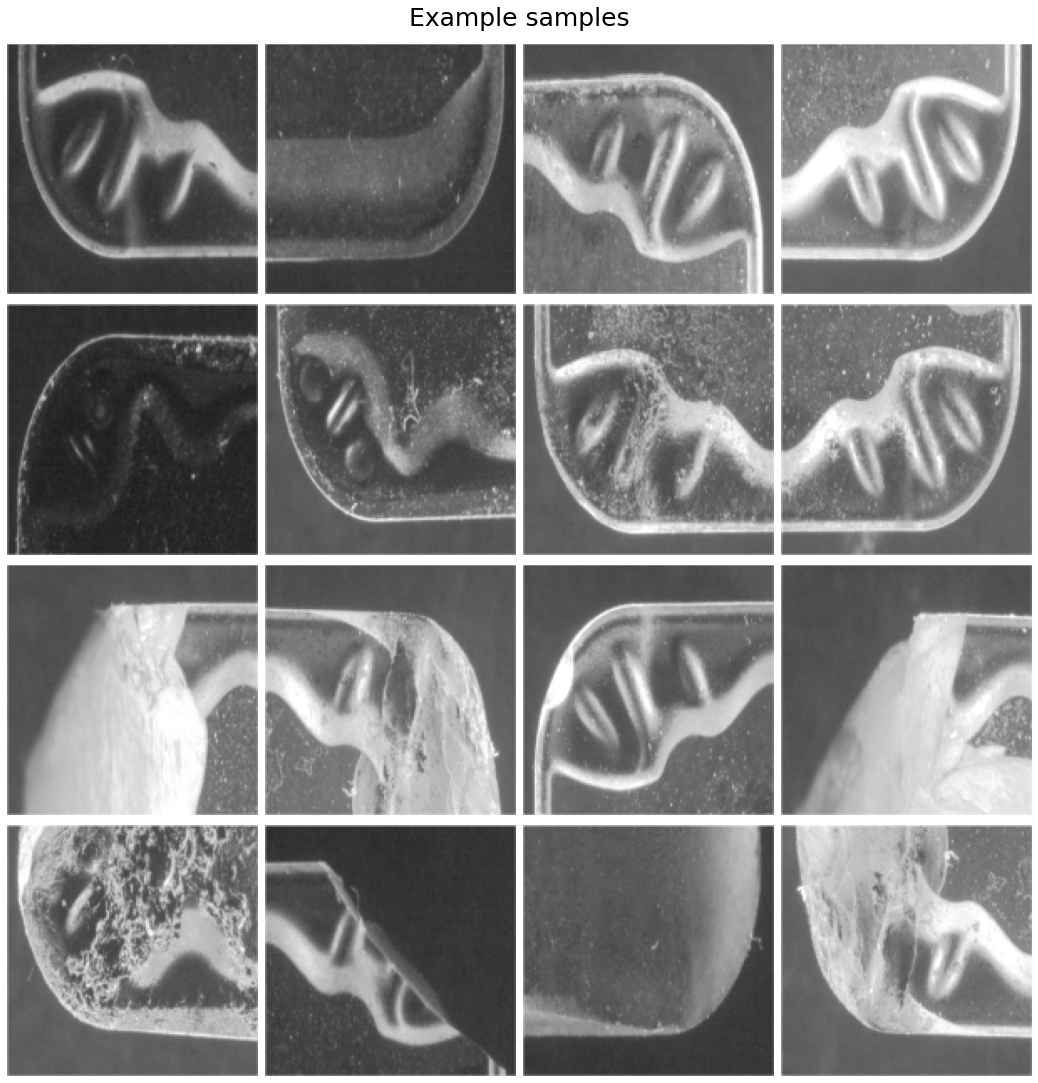

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_good_inserts_names = os.listdir(test_dir+'samples_good')
test_faulty_inserts_names = os.listdir(test_dir+'samples_faulty')

%matplotlib inline
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 8
next_good_pix = [os.path.join(test_dir+'samples_good', fname) 
                for fname in test_good_inserts_names[pic_index-8:pic_index]]
next_faulty_pix = [os.path.join(test_dir+'samples_faulty', fname) 
                for fname in test_faulty_inserts_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_good_pix + next_faulty_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
fig.suptitle("Example samples",fontsize=25)
plt.tight_layout(pad=6, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
next_good_pix = [os.path.join(test_dir + 'samples_good', fname) 
                for fname in test_good_inserts_names[:]]
next_faulty_pix = [os.path.join(test_dir + 'samples_faulty', fname) 
                for fname in test_faulty_inserts_names[:]]

uploaded = next_faulty_pix + next_good_pix

classification = []

for fn in uploaded:
  img = image.load_img(fn, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x/=255
  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  classification.append(classes)




# Results

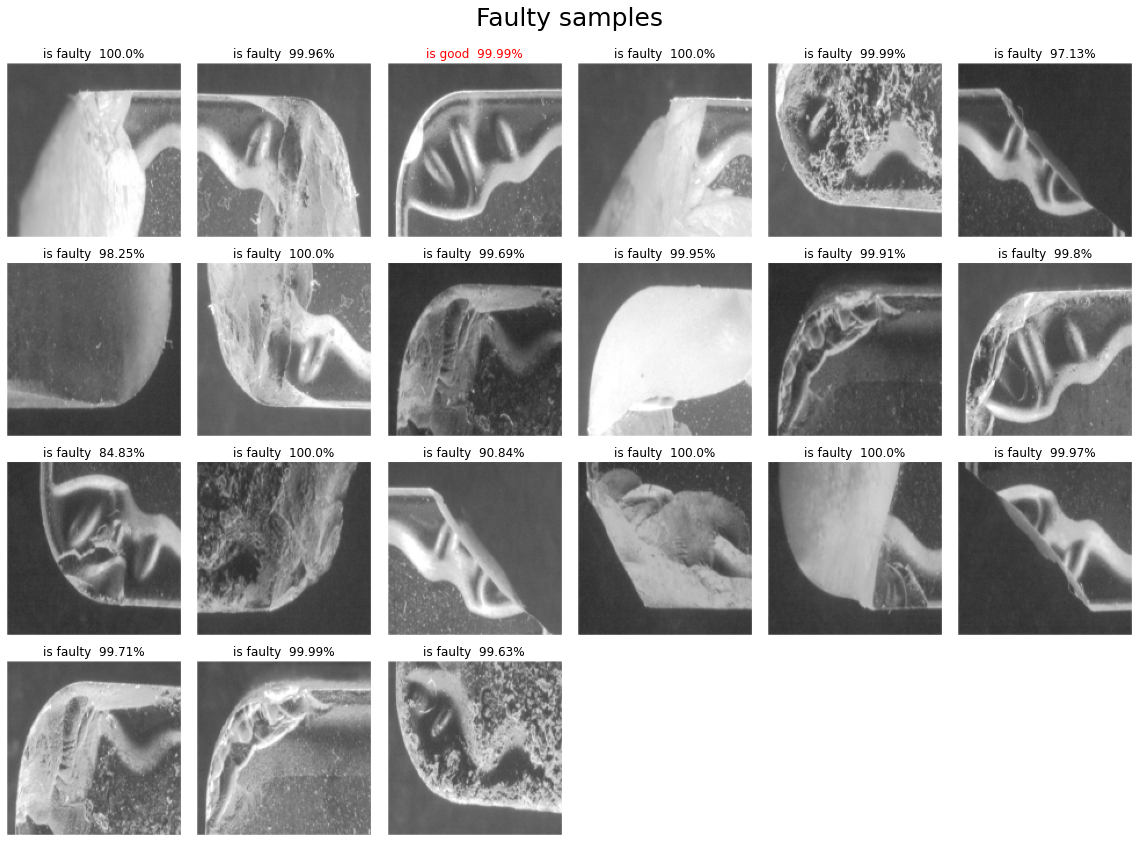

In [ ]:
false_faulty_identification = 0 
true_faulty_identification = 0 
n_cols = 6
n_rows = int(len(next_faulty_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for i, img_path in enumerate(next_faulty_pix):
  if classification[i] > 0.5:
    title =  "is good  " + str(round(float((classification[i])*100),2)) + "%"
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
    false_faulty_identification += 1
  else:
    title =  "is faulty  " + str(round(float((1-classification[i])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
    true_faulty_identification +=1
 
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Faulty samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

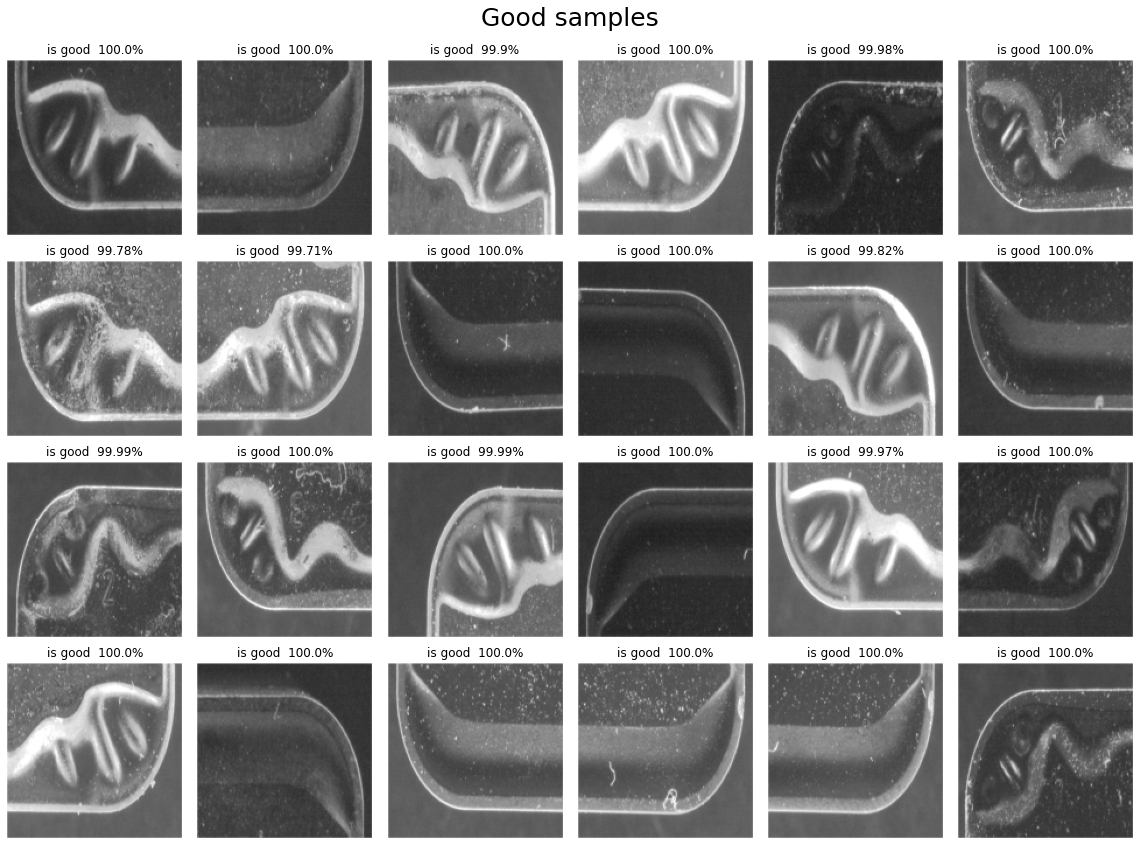

In [ ]:
false_good_identification = 0
true_good_identification = 0
n_cols = 6
n_rows = int(len(next_good_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for j, img_path in enumerate(next_good_pix):
  
  if classification[j+i+1] > 0.5:
    true_good_identification +=1
    title =  "is good  " + str(round(float((classification[j+i+1])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
  else:
    title =  "is faulty  " + str(round(float((1-classification[j+i+1])*100),2)) + "%"
    false_good_identification +=1
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
  
  sp = plt.subplot(n_rows, n_cols, j + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Good samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
wrong_identification = false_good_identification + false_faulty_identification
correct = len(uploaded)-wrong_identification
accuracy = correct/len(uploaded)*100
PPV = true_good_identification/(true_good_identification + false_good_identification)*100
NPV = true_faulty_identification/(true_faulty_identification + false_faulty_identification)*100

print("Number of test images:",len(uploaded))
print("Identified corectly:",correct)
print("Identified incorectly:",wrong_identification)



print("PPV {:.2f}%".format(PPV))
print("NPV {:.2f}%".format(NPV))
print("Overall ccuracy: {:.2f}%".format(accuracy))

Number of test images: 45
Identified corectly: 44
Identified incorectly: 1
PPV 100.00%
NPV 95.24%
Overall ccuracy: 97.78%


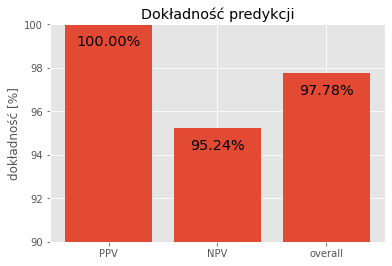

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        y_txt = "{:.2f}%".format(y[i])
        plt.text(i, y[i]-1, y_txt, ha = 'center', fontsize="x-large")

plt.style.use('ggplot')

x = ['PPV', 'NPV', 'overall']
precent = [PPV,NPV,accuracy]

x_pos = [i for i, _ in enumerate(x)]

fig = plt.bar(x_pos, precent)
plt.ylabel("dokładność [%]")
plt.title("Dokładność predykcji")
plt.ylim(int(min(PPV,NPV)-5),100)
plt.xticks(x_pos, x)
addlabels(x, precent)


plt.show()


# Manual tests

In [ ]:
uploaded = files.upload()

In [ ]:

# TESTING NEW IMAGES - NEED TO UPDATE IT
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2 as cv

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = cv.imread(path, cv.IMREAD_UNCHANGED)
  x = cv.resize(img, (150,150))[None, ...] / 255
  # x /= 255
  print(img.shape)
  # img = image.load_img(path, target_size=(150, 150))
  # x = image.img_to_array(img)
  # x = np.expand_dims(x, axis=0)
  # x/=255

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is good")
  else:
    print(fn + " is faulty")
 

# Zapis i oczyt modelu

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/cutting-inserts-samples/InceptionV3')

In [ ]:
model.save('/content/drive/MyDrive/cutting-inserts-samples/InceptionV3')